In [1]:
# --- 1. Import Libraries & Load Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # ใช้สำหรับทำ Heatmap
import os

# ตั้งค่า Path ไปยังโฟลเดอร์
DATA_DIR = '../data/MODEL_INPUTS/'
FILE_NAME = 'master_features_clustered_v2_pca.csv' # <-- ใช้ไฟล์ล่าสุดจาก 04
FILE_PATH = os.path.join(DATA_DIR, FILE_NAME)

try:
    df_clustered = pd.read_csv(FILE_PATH)
    print(f"Successfully loaded: {FILE_PATH}")
    print(f"Data shape: {df_clustered.shape}")
except FileNotFoundError:
    print(f"!!! ERROR: File not found at {FILE_PATH}")

# (เราจะใช้ dcode ในการ join กลับทีหลัง)

Successfully loaded: ../data/MODEL_INPUTS/master_features_clustered_v2_pca.csv
Data shape: (50, 64)


In [2]:
# --- 2. กำหนดฟีเจอร์สำหรับวิเคราะห์โปรไฟล์ ---
# (เราจะใช้ฟีเจอร์ "ดั้งเดิม" ที่อ่านเข้าใจง่าย)
# (เราจะ "ไม่สนใจ" คอลัมน์ PC1-PC15 ที่มันงงๆ แล้วครับ)

PROFILE_FEATURES = [
    'AREA', 
    'population', 
    'canal_count', 
    'flood_point_count', 
    'floodgate_count',
    'avg_rain_rainy', # <-- ข้อมูลฤดูกาล (จาก rain_2024_with_seasons.csv)
    'avg_rain_summer', # <-- ข้อมูลฤดูกาล
    'avg_rain_winter', # <-- ข้อมูลฤดูกาล
    'pump_ready', 
    'pump_support',
    'คะแนนรวม', 
    'population_density', 
    'canal_density', 
    'flood_point_density',
    'floodgate_density', 
    'pump_per_capita', 
    'pump_readiness_ratio',
    'flood_point_per_canal', 
    'risk_score_per_pump'
]

# กรองเอาเฉพาะคอลัมน์ที่มีอยู่
PROFILE_FEATURES = [col for col in PROFILE_FEATURES if col in df_clustered.columns]

In [3]:
# --- 3. คำนวณ Cluster Profiles (หาค่าเฉลี่ย) ---
# นี่คือหัวใจสำคัญ: เราจะดูว่าโดยเฉลี่ยแล้ว แต่ละกลุ่มมีค่าฟีเจอร์เป็นอย่างไร

cols_to_profile = PROFILE_FEATURES + ['cluster']
df_profile_data = df_clustered[cols_to_profile]

# Group by 'cluster' และหาค่าเฉลี่ย
cluster_profile = df_profile_data.groupby('cluster').mean()

print("--- Cluster Profile (Mean Values) ---")
# .T เพื่อสลับแถวกับคอลัมน์ให้ดูง่ายขึ้น
display(cluster_profile.T)

--- Cluster Profile (Mean Values) ---


cluster,0,1,2,3
AREA,5.136213e+07,8.221211e+06,1.193956e+07,1.011108e+07
population,1.369200e+05,7.321520e+04,1.084984e+05,7.995691e+04
canal_count,3.888462e+01,1.140000e+01,5.900000e+01,1.290909e+01
flood_point_count,5.000000e-01,1.200000e+00,0.000000e+00,9.090909e-02
floodgate_count,1.846154e+00,4.000000e-01,3.000000e+00,2.727273e-01
avg_rain_rainy,2.682051e+00,1.948333e+00,1.910417e+00,1.754545e+00
avg_rain_summer,6.608440e+00,6.122222e+00,6.055556e+00,7.873737e+00
avg_rain_winter,4.330128e+00,4.470833e+00,4.542969e+00,3.644886e+00
pump_ready,1.526923e+01,3.600000e+00,8.000000e+00,6.909091e+00
pump_support,5.538462e+00,2.000000e-01,1.250000e+00,1.818182e+00


/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3649 (\N{THAI CHARACTER SARA AE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/anaconda3/envs/flood_env/lib/python3.11/site-packages/seaborn/

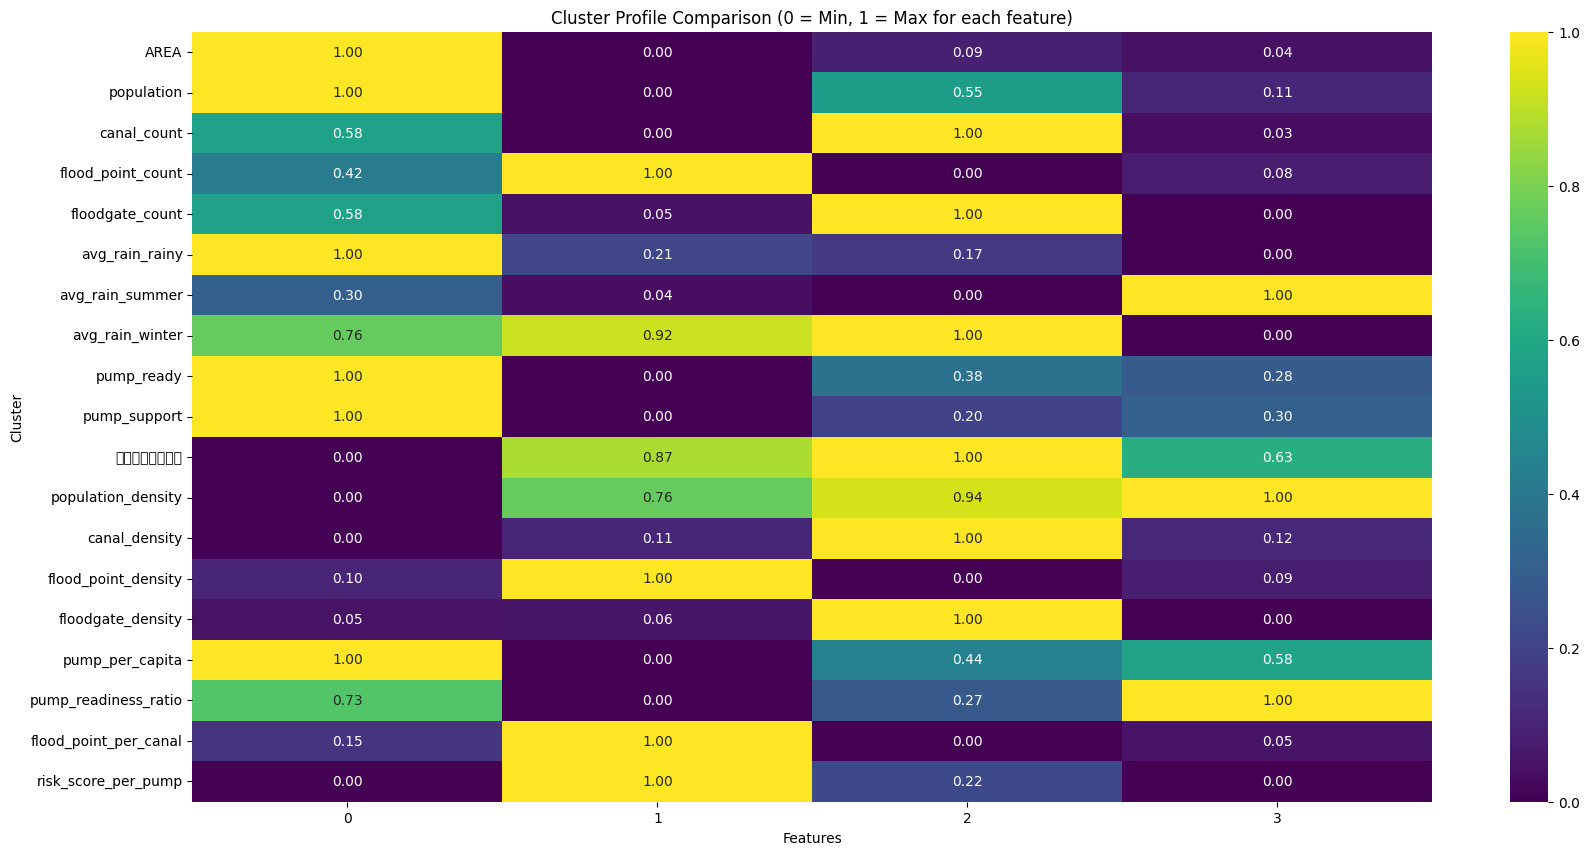

In [4]:
# --- 4. สร้าง Heatmap เพื่อเปรียบเทียบโปรไฟล์ ---
# (Scale ค่าเฉลี่ยให้อยู่ในช่วง 0-1 เพื่อให้เปรียบเทียบกันได้)

scaler = MinMaxScaler()
# เรา Scale แต่ละฟีเจอร์ (แนวตั้ง, axis=0) เพื่อดูว่ากลุ่มไหน "เด่น" หรือ "ด้อย"
profile_scaled = scaler.fit_transform(cluster_profile)

df_profile_scaled = pd.DataFrame(profile_scaled, 
                                 columns=cluster_profile.columns, 
                                 index=cluster_profile.index)

# วาด Heatmap (เรา .T เพื่อให้ cluster อยู่แกน Y จะดูง่ายกว่า)
plt.figure(figsize=(20, 10))
sns.heatmap(df_profile_scaled.T, annot=True, fmt='.2f', cmap='viridis')
plt.title('Cluster Profile Comparison (0 = Min, 1 = Max for each feature)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

# *** การตีความ Heatmap นี้ ***
# - มองหาช่องที่เป็นสีเหลือง (ค่าใกล้ 1.0) 
#   เช่น: ถ้าแถว Cluster 1 เป็นสีเหลืองที่คอลัมน์ 'avg_rain_rainy' 
#   แปลว่า "Cluster 1 คือกลุ่มที่ฝนตกหนักที่สุดในฤดูฝน"
# - มองหาช่องที่เป็นสีม่วง (ค่าใกล้ 0.0)
#   เช่น: ถ้าแถว Cluster 1 เป็นสีม่วงที่คอลัมน์ 'pump_ready'
#   แปลว่า "Cluster 1 คือกลุ่มที่มีเครื่องสูบน้ำพร้อมใช้น้อยที่สุด"

In [5]:
# --- 5. แสดงรายชื่อเขตในแต่ละกลุ่ม ---
# (เพื่อดูว่าเขตไหนอยู่กลุ่มไหน)

# เพิ่ม 'dname' และ 'district_group' เข้ามาเพื่อดูผล
df_final_list = df_clustered[['dname', 'district_group', 'cluster']]

print("\n--- รายชื่อเขตในแต่ละกลุ่ม ---")
FINAL_K = 4 # จำนวนกลุ่มที่เราตั้งไว้
for i in range(FINAL_K):
    print(f"\n=== Cluster {i} ({df_final_list[df_final_list['cluster'] == i].shape[0]} เขต) ===")
    
    # ดึงรายชื่อเขต
    districts_in_cluster = df_final_list[df_final_list['cluster'] == i]['dname'].tolist()
    print(", ".join(districts_in_cluster))
    
    # (Optional) ดูว่าอยู่ในกลุ่มพื้นที่ไหนบ้าง
    print(f"-- (กลุ่มพื้นที่: {df_final_list[df_final_list['cluster'] == i]['district_group'].unique()})")

print("\n--- จบการทำงาน Notebook 05 (Analysis) ---")


--- รายชื่อเขตในแต่ละกลุ่ม ---

=== Cluster 0 (26 เขต) ===
เขตวังทองหลาง, เขตทวีวัฒนา, เขตลาดกระบัง, เขตตลิ่งชัน, เขตสะพานสูง, เขตบางแค, เขตสวนหลวง, เขตประเวศ, เขตหนองแขม, เขตราษฏร์บูรณะ, เขตบางบอน, เขตบางขุนเทียน, เขตดอนเมือง, เขตหนองจอก, เขตสายไหม, เขตคลองสามวา, เขตหลักสี่, เขตบางเขน, เขตจตุจักร, เขตคันนายาว, เขตมีนบุรี, เขตลาดพร้าว, เขตบางซื่อ, เขตบึงกุ่ม, เขตบางกะปิ, เขตทุ่งครุ
-- (กลุ่มพื้นที่: ['กรุงเทพกลาง' 'กรุงธนเหนือ' 'กรุงเทพตะวันออก' 'กรุงธนใต้' 'กรุงเทพใต้'
 'กรุงเทพเหนือ'])

=== Cluster 1 (5 เขต) ===
เขตดุสิต, เขตพญาไท, เขตราชเทวี, เขตพระนคร, เขตปทุมวัน
-- (กลุ่มพื้นที่: ['กรุงเทพกลาง' 'กรุงเทพใต้'])

=== Cluster 2 (8 เขต) ===
เขตบางพลัด, เขตบางกอกน้อย, เขตบางกอกใหญ่, เขตภาษีเจริญ, เขตธนบุรี, เขตคลองสาน, เขตจอมทอง, เขตบางคอแหลม
-- (กลุ่มพื้นที่: ['กรุงธนเหนือ' 'กรุงธนใต้' 'กรุงเทพใต้'])

=== Cluster 3 (11 เขต) ===
เขตห้วยขวาง, เขตดินแดง, เขตป้อมปราบศัตรูพ่าย, เขตวัฒนา, เขตสัมพันธวงศ์, เขตคลองเตย, เขตบางรัก, เขตสาทร, เขตยานนาวา, เขตพระโขนง, เขตบางนา
-- (กลุ่มพื้นที่: ['กร